# Лабораторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df.head(10)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good
6,0<=X<200,24.0,critical/other existing credit,1216.0,<1,male single,4.0,no known property,38.0,own,2.0,skilled,2.0,none,yes,bad
7,<0,24.0,existing paid,1207.0,<1,female div/dep/mar,4.0,life insurance,24.0,rent,1.0,skilled,1.0,none,yes,bad
8,no checking,10.0,existing paid,1309.0,1<=X<4,male single,4.0,life insurance,27.0,own,1.0,unskilled resident,1.0,none,yes,bad
9,>=200,15.0,critical/other existing credit,2360.0,1<=X<4,male single,2.0,car,36.0,own,1.0,skilled,1.0,yes,yes,good
10,0<=X<200,15.0,all paid,6850.0,unemployed,male single,2.0,life insurance,34.0,own,1.0,high qualif/self emp/mgmt,2.0,yes,yes,bad


### Вопрос 1.
#### В какой шкале представлены все признаки в наборе?

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

> **Номинальные:**
    1. credit_history
    2. personal_status
    3. property_magnitude
    4. housing
    5. job
    6. own_telephone
    7. foreign_worker
    8. class  
    
> **Порядковые:**
    1. checking_status
    2. employment
   
> **Абсолютные:**
    1. duration
    2. credit_amount
    3. residence_since
    4. age
    5. existing_credits
    6. num_dependents

### Вопрос 2.
#### Укажите признак с наименьшей дисперсией.

In [5]:
credit_df.describe().loc['std']

duration              11.983
credit_amount       2843.499
residence_since        1.151
age                   11.274
existing_credits       0.586
num_dependents         0.374
Name: std, dtype: float64

**(!) Минимальная дисперсия у признака _num_dependents_**

### Вопрос 3.
#### Среднее какого признака отличается для двух классов сильнее всего?

In [6]:
print(credit_df[credit_df["class"] == 'good'].describe().loc['mean'])
print('\n')
print(credit_df[credit_df["class"] == 'bad'].describe().loc['mean'])

duration              19.973
credit_amount       3077.320
residence_since        2.781
age                   36.621
existing_credits       1.453
num_dependents         1.175
Name: mean, dtype: float64


duration              24.524
credit_amount       3565.748
residence_since        2.901
age                   33.317
existing_credits       1.354
num_dependents         1.152
Name: mean, dtype: float64


**(!) Среднее значение _credit_amount_ отличается больше всего для двух классов**

### Вопрос 4.
#### В каком классе больше всего skilled работников?

In [7]:
credit_df[credit_df["job"] == 'skilled'].groupby(by='class').count()['job']

class
bad     107
good    213
Name: job, dtype: int64

**(!) В классе _good_ больше всего skilled работников**

### Вопрос 5.
#### Есть ли в наборе признаки с выбросами? Какие?

<AxesSubplot:>

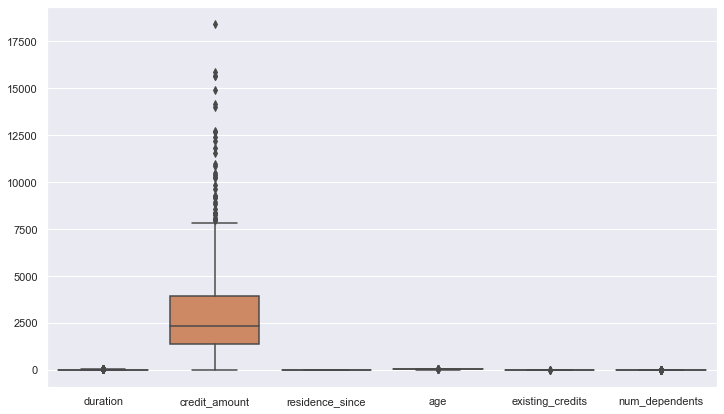

In [8]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

<AxesSubplot:>

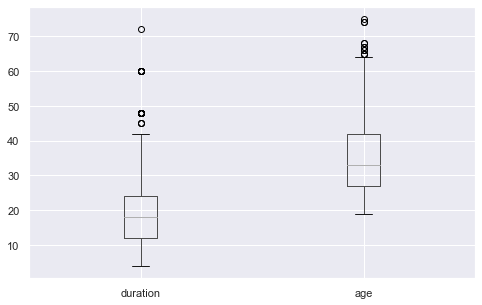

In [9]:
plt.subplots(figsize=(8,5))
credit_df.boxplot(column=['duration','age'])

<AxesSubplot:>

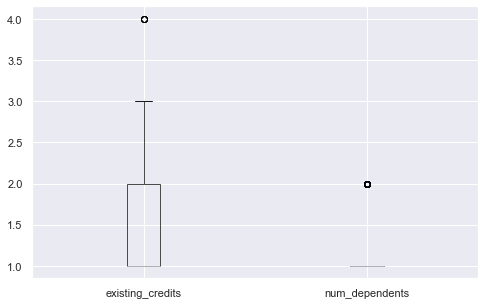

In [10]:
plt.subplots(figsize=(8,5))
credit_df.boxplot(column=['existing_credits','num_dependents'])

### Вопрос 6.
#### Сколько пропущенных значений в наборе?

In [11]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
credit_amount          1
employment             0
personal_status        0
residence_since       17
property_magnitude     0
age                    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

**(!) В наборе 1 пропущенное значение в _credit_amount_ и 17 в _residence_since_**

### Вопрос 7.
#### Попытайтесь заполнить пропущенные значения.

In [12]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [13]:
credit_df['residence_since'].fillna(value=credit_df['residence_since'].median(), inplace=True)
credit_df['credit_amount'].fillna(value=credit_df['credit_amount'].mean(), inplace=True)

In [14]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

**(!) Заменили пропущенные значения медианой и средним значениями**

### Вопрос 8.
#### Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

**(!) Номинальный признак _job_**

<AxesSubplot:title={'center':'Job Count'}>

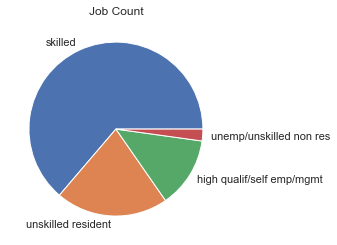

In [15]:
credit_df['job'].value_counts().plot(kind='pie', title='Job Count', label='')

**(!) Абсолютный признак _age_**

<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

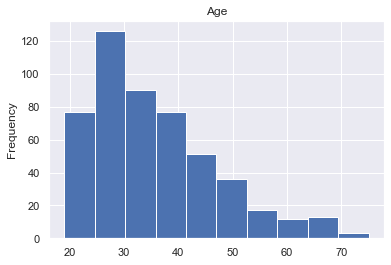

In [16]:
credit_df['age'].plot(kind='hist', title='Age')

**(!) Порядковый признак _employment_**

<AxesSubplot:title={'center':'Employment'}>

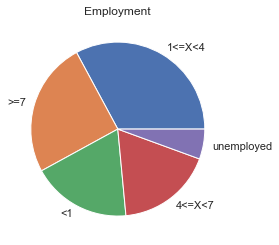

In [17]:
credit_df['employment'].value_counts().plot(kind='pie', title='Employment', label='')

### Вопрос 9.
#### Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

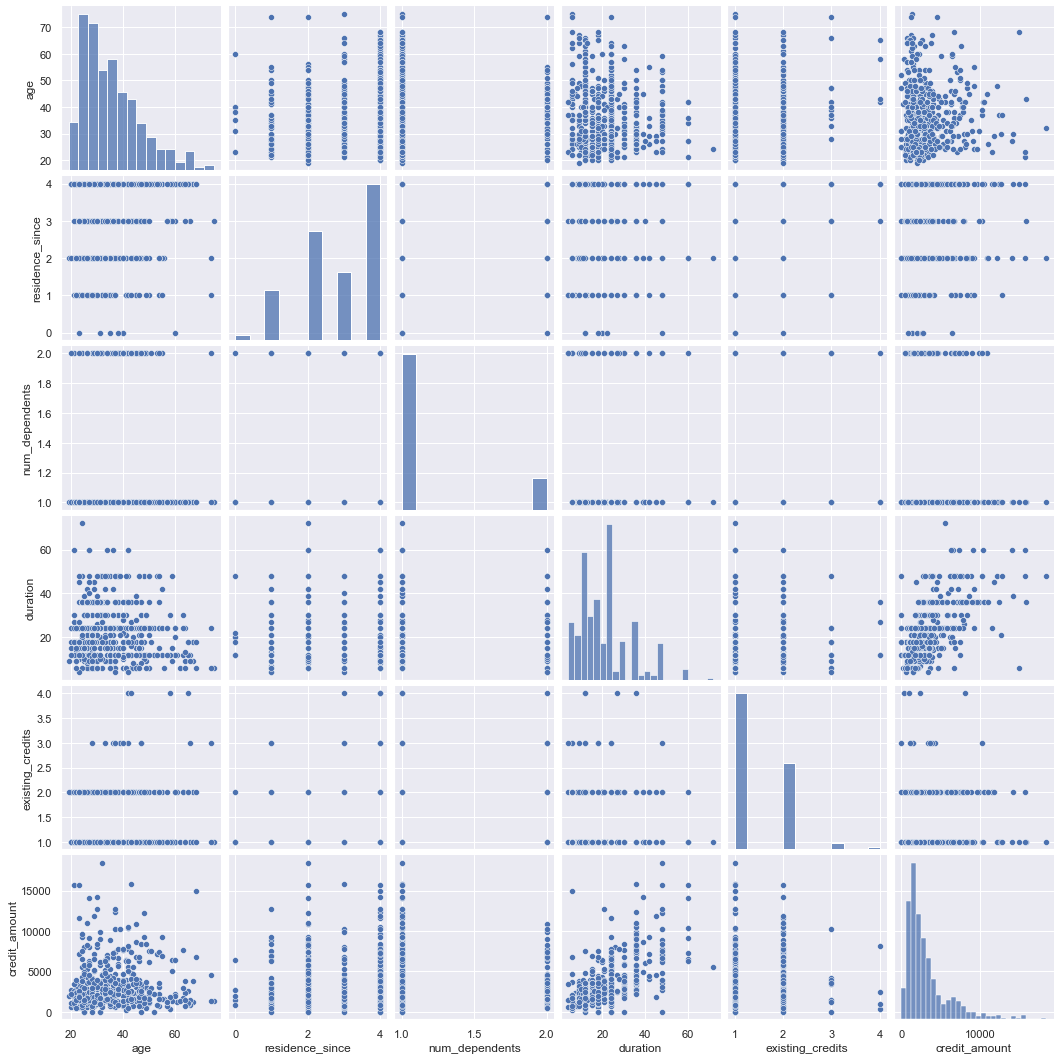

In [18]:
num_columns = list(set(['duration','credit_amount','residence_since','age','existing_credits','num_dependents']))
sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

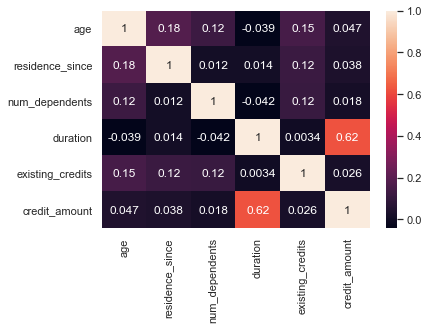

In [19]:
corr_matrix = credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

**(!) В основном люди _от 20 до 50_ берут кредиты на _небольшие суммы_** <br/>
**(!) Меньшая _сумма кредита_ дается на _меньший срок_**<br/>
**(!) Чем _больше_ у человека _количество кредитов_, тем на _меньшую сумму и срок_ они взяты**<br/>
**(!) Чем _меньше_ человек является _клиентом банка_, тем _меньше сумма кредита_**<br/>
**(!) Чем _больше_ у человека _иждивенцев_, тем меньше _сумма кредита_**<br/>

### Вопрос 10.
#### Какой признак(и) имеет смысл стандартизировать? Почему?

**(!) Стандартизировать имеет смысл _порядковые признаки_ для более удобого сравнения.** <br/>

### Вопрос 11.
#### Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

**(!) _Наличие регистрации_ у человека в регионе банка. Если есть регистрация в регионе банка, банк с большей вероятностью выдаст кредит** <br/>
**(!) _Цель кредита_, она является важным доказательством благонадежности клиента** <br/>
**(!) _Количество незакрытых судимостей_, важный пункт, который влияет на выдачу кредита** <br/>